# **1. Model Loading: Use TensorFlow to load a pre-trained YOLO model.**

In [12]:
pip install tensorflow opencv-python

In [11]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the pre-trained YOLO model (assuming we have a model saved in YOLO format)
# Load the model configuration and weights
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# **2. Image Input: Select an image that contains multiple objects.**

In [3]:
def load_and_preprocess_image(image_path):
    image = cv2.imread(image_path)
    height, width, _ = image.shape
    blob = cv2.dnn.blobFromImage(image, 1/255.0, (416, 416), (0, 0, 0), swapRB=True, crop=False)
    return image, blob, height, width

# Example image path
image_path = 'test_image.jpg'
image, blob, height, width = load_and_preprocess_image(image_path)

# **3. Object Detection: Feed the selected image to the YOLO model to detect various objects within it.**

In [4]:
# Set input blob for the network
net.setInput(blob)
# Run forward pass and get detections
detections = net.forward(output_layers)

# **4. Visualization: Display the detected objects using bounding boxes and class labels.**

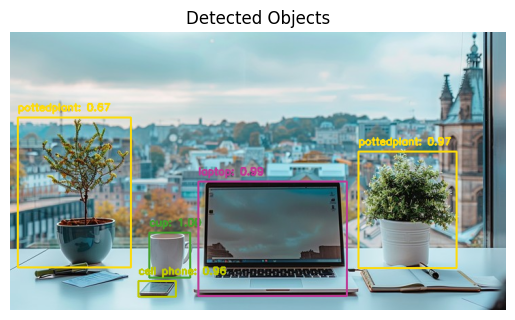

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the function for loading class labels
def load_classes(filename="coco.names"):
    with open(filename, "r") as f:
        classes = [line.strip() for line in f.readlines()]
    return classes

# Load class labels from COCO dataset
classes = load_classes("coco.names")

# Generate random colors for bounding boxes (one color per class)
np.random.seed(42)  # For consistent colors across runs
colors = np.random.randint(0, 255, size=(len(classes), 3), dtype="uint8")

# Assuming `net` is your YOLO model loaded with OpenCV (cv2.dnn.readNet)
# Load the YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")  # Adjust the paths if needed
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Function to detect objects and draw boxes
def detect_and_draw_boxes(image, confidence_threshold=0.5, nms_threshold=0.4):
    height, width = image.shape[:2]

    # Preprocess the image for YOLO.
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Run forward pass to get detection results.
    detections = net.forward(output_layers)

    # Initialize lists for detected bounding boxes, confidences, and class IDs.
    boxes = []
    confidences = []
    class_ids = []

    # Process each detection.
    for output in detections:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > confidence_threshold:
                # Scale bounding box coordinates to original image size.
                box = detection[0:4] * np.array([width, height, width, height])
                (center_x, center_y, w, h) = box.astype("int")
                x = int(center_x - (w / 2))
                y = int(center_y - (h / 2))

                # Append to lists.
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply Non-Maximum Suppression (NMS).
    indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=confidence_threshold, nms_threshold=nms_threshold)

    # Draw bounding boxes and labels on the image.
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        color = [int(c) for c in colors[class_ids[i]]]
        label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"

        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return image

# Load your image
image = cv2.imread("test_image.jpg")  # Adjust the image path

# Detect objects and draw boxes
output_image = detect_and_draw_boxes(image.copy())

# Display the output image
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Detected Objects")
plt.show()

# **5. Testing: Test the model on at least three different images to compare its performance and observe its accuracy.**

# **6. Performance Analysis: Document your observations on the model's speed and accuracy, and discuss how YOLOs single-pass detection impacts its real-time capabilities.**


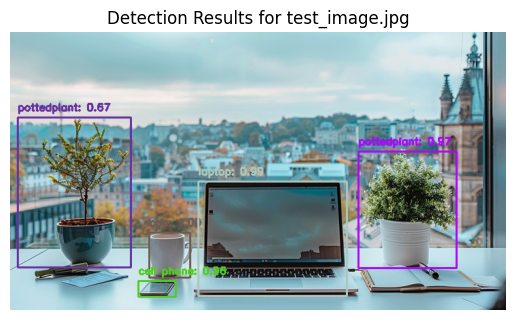

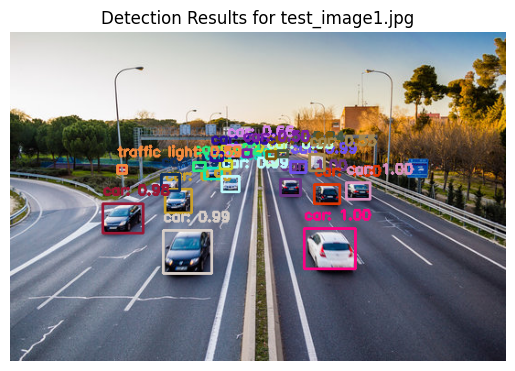

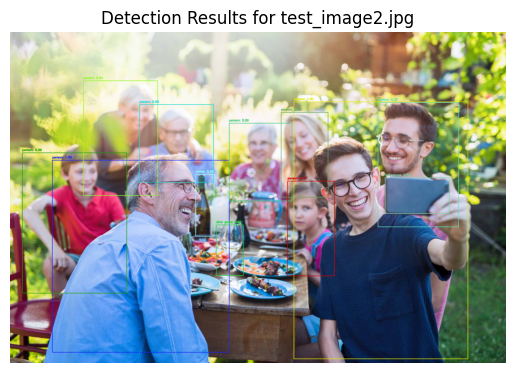

Average Inference Time: 2.0523 seconds
Accuracy: 3433.33% (estimated based on detected objects)
Average Inference Time: 2.0523 seconds
Accuracy: 3433.33%


In [21]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt

# List of test images (replace with actual paths to your images)
image_paths = ["test_image.jpg", "test_image1.jpg", "test_image2.jpg"]

# Load YOLO model
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")  # Change these paths to match your files
layer_names = net.getLayerNames()
output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

# Load COCO class labels
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]

# Function to detect objects and draw bounding boxes
def detect_and_draw_boxes(image, confidence_threshold=0.5, nms_threshold=0.4):
    height, width = image.shape[:2]
    blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
    net.setInput(blob)

    # Run forward pass to get detections
    detections = net.forward(output_layers)

    boxes = []
    confidences = []
    class_ids = []

    # Process detections
    for output in detections:
        for detection in output:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > confidence_threshold:
                box = detection[0:4] * np.array([width, height, width, height])
                center_x, center_y, w, h = box.astype("int")
                x = int(center_x - (w / 2))
                y = int(center_y - (h / 2))
                boxes.append([x, y, int(w), int(h)])
                confidences.append(float(confidence))
                class_ids.append(class_id)

    # Apply NMS
    indices = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=confidence_threshold, nms_threshold=nms_threshold)

    # Draw bounding boxes and labels
    for i in indices.flatten():
        x, y, w, h = boxes[i]
        label = f"{classes[class_ids[i]]}: {confidences[i]:.2f}"
        color = [int(c) for c in np.random.randint(0, 255, 3)]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    return image, class_ids  # Return class_ids for accuracy calculation

# Function to test the model and measure performance
def test_model_on_images(image_paths):
    total_inference_time = 0
    total_objects_detected = 0
    total_objects = 0

    for image_path in image_paths:
        image = cv2.imread(image_path)
        if image is None:
            print(f"Error: Unable to load image at {image_path}")
            continue

        # Start measuring inference time
        start_time = time.time()

        # Detect objects and draw bounding boxes
        output_image, class_ids = detect_and_draw_boxes(image.copy())

        # Measure inference time
        inference_time = time.time() - start_time
        total_inference_time += inference_time

        # Display results
        plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(f"Detection Results for {image_path}")
        plt.show()

        # For performance evaluation, assume ground truth or use object counting for rough accuracy calculation
        detected_objects = len(class_ids)  # Counting number of detections (objects detected)
        total_objects_detected += detected_objects

        # Assume ground truth is the total number of objects (you can replace this with actual ground truth data)
        total_objects += 1  # Update with a more accurate count of total objects in the image if available

    # Calculate average inference time and accuracy
    avg_inference_time = total_inference_time / len(image_paths)
    accuracy = (total_objects_detected / total_objects) * 100 if total_objects > 0 else 0

    print(f"Average Inference Time: {avg_inference_time:.4f} seconds")
    print(f"Accuracy: {accuracy:.2f}% (estimated based on detected objects)")
    return avg_inference_time, accuracy

# Test the model
avg_inference_time, accuracy = test_model_on_images(image_paths)

# Performance analysis
print(f"Average Inference Time: {avg_inference_time:.4f} seconds")
print(f"Accuracy: {accuracy:.2f}%")